# Pytorch

PyTorch is a dynamic and powerful tool for building and training machine learning models. It simplifies the process with its fundamental building blocks like tensors and neural networks and offers effective ways to define objectives and improve models using loss functions and optimizers. By leveraging PyTorch, anyone can gain the skills to work with large amounts of data and develop cutting-edge AI applications.

## Tensors

PyTorch is a dynamic and powerful tool for building and training machine learning models. It simplifies the process with its fundamental building blocks like tensors and neural networks and offers effective ways to define objectives and improve models using loss functions and optimizers. By leveraging PyTorch, anyone can gain the skills to work with large amounts of data and develop cutting-edge AI applications.

* Tensors: Generalized versions of vectors and matrices that can have any number of dimensions (i.e. multi-dimensional arrays). They hold data for processing with operations like addition or multiplication.

* Matrix operations: Calculations involving matrices, which are two-dimensional arrays, like adding two matrices together or multiplying them.

* Scalar values: Single numbers or quantities that only have magnitude, not direction (for example, the number 7 or 3.14).



In [1]:
import torch
import matplotlib.pyplot as plt

### Images as PyTorch Tensors


In [2]:
# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]

### Displaying Images

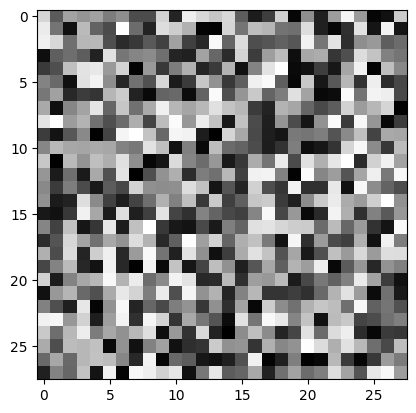

In [5]:
plt.imshow(second_image, cmap="gray")
plt.show()

### Matrix Multiplication


In [6]:
a = torch.tensor([[1, 1], [1, 0]])

print(a)

print(torch.matrix_power(a, 2))

print(torch.matrix_power(a, 3))

print(torch.matrix_power(a, 4))

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


### Resources

* [Tensors tutorial](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)
* [Tensors documentation](https://pytorch.org/docs/stable/tensors.html)

## Neural Networks

PyTorch offers powerful features to create and interlink neural networks, which are key elements in understanding modern artificial intelligence. We explored creating a multi-layer perceptron using PyTorch's nn.Module class and then passed a tensor into it and received the output.

In [7]:
import torch.nn as nn


class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 64)
        self.output_layer = nn.Linear(64, 2)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)


model = MLP(input_size=10)
print(model)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
)


In [8]:
model.forward(torch.rand(10))

tensor([-0.0064, -0.1078], grad_fn=<ViewBackward0>)

### Resources

* [PyTorch nn tutorial](https://pytorch.org/tutorials/beginner/nn_tutorial.html)

* [PyTorch nn documentation](https://pytorch.org/docs/stable/nn.html)

* [torch.nn.Module documentation](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)

* [torch.nn.Linear documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)

* [torch.nn.ReLU documentation](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)

## Loss function

PyTorch loss functions are essential tools that help in improving the accuracy of a model by measuring errors. These functions come in different forms to tackle various problems, like deciding between categories (classification) or predicting values (regression). Understanding and using these functions correctly is key to making smart, effective models that do a great job at the tasks they're designed for!

* Loss functions: They measure how well a model is performing by calculating the difference between the model's predictions and the actual results.

* Cross entropy loss: This is a measure used when a model needs to choose between categories (like whether an image shows a cat or a dog), and it shows how well the model's predictions align with the actual categories.

* Mean squared error: This shows the average of the squares of the differences between predicted numbers (like a predicted price) and the actual numbers. It's often used for predicting continuous values rather than categories.

### Cross-Entropy Loss

In [13]:
import torch
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()

# Our dataset contains a single image of a dog, where
# cat = 0 and dog = 1 (corresponding to index 0 and 1) [Cat, Dog]
target_tensor = torch.tensor([1])
target_tensor
# Prediction: Most likely a dog (index 1 is higher)

tensor([1])

In [15]:
# Note that the values do not need to sum to 1
predicted_tensor = torch.tensor([[2.0, 5.0]]) # two classes, the second larger == more likely
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# Prediction: Most likely a dog (index 1 is higher)

tensor(0.0486)

In [16]:
predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# Prediction: Slightly more likely a cat (index 0 is higher)

tensor(0.9130)

### Mean Squared Error Loss

In [17]:
# Define the loss function
loss_function = nn.MSELoss()

# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item())  # Loss value: 20000 * 20000 / 1 = ...

400000000.0


### Resources

* [Index of PyTorch loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

## Optimizers

PyTorch optimizers are important tools that help improve how a neural network learns from data by adjusting the model's parameters. By using these optimizers, like stochastic gradient descent (SGD) with momentum or Adam, we can quickly get started learning!

* Gradients: Directions and amounts by which a function increases most. The parameters can be changed in a direction opposite to the gradient of the loss function in order to reduce the loss.

* Learning Rate: This hyperparameter specifies how big the steps are when adjusting the neural network's settings during training. Too big, and you might skip over the best setting; too small, and it'll take a very long time to get there.

* Momentum: A technique that helps accelerate the optimizer in the right direction and dampens oscillations.

In [19]:
import torch.optim as optim

# momentum=0.9 smoothes out updates and can help training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [20]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Resources

* [PyTorch optimization tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)

* [Index of PyTorch optimizers](https://pytorch.org/docs/stable/optim.html#algorithms)

## Pytorch Datasets and Data Loaders

PyTorch makes accessing data for your model a breeze! These tools ensure that the flow of information to our AI is just right, making its learning experience effective and fun.

* PyTorch Dataset class: This is like a recipe that tells your computer how to get the data it needs to learn from, including where to find it and how to parse it, if necessary.

* PyTorch Data Loader: Think of this as a delivery truck that brings the data to your AI in small, manageable loads called batches; this makes it easier for the AI to process and learn from the data.

* Batches: Batches are small, evenly divided parts of data that the AI looks at and learns from each step of the way.

* Shuffle: It means mixing up the data so that it's not in the same order every time, which helps the AI learn better.

### Dataset

In [21]:
from torch.utils.data import Dataset

# Create a toy dataset
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

# Instantiate the dataset
dataset = NumberProductDataset(
    data_range=(0, 11)
)

# Access a data sample
data_sample = dataset[3]
print(data_sample)


((3, 4), 12)


### Data Loader

In [23]:
from torch.utils.data import DataLoader

# Instantiate the dataset
dataset = NumberProductDataset(data_range=(0, 5))

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=3, shuffle=False)

# Iterating over batches
for num_pairs, products in dataloader:
    print(num_pairs, products)
    # 3 * 4 = 12
    # 2 * 3 = 6

[tensor([0, 1, 2]), tensor([1, 2, 3])] tensor([0, 2, 6])
[tensor([3, 4]), tensor([4, 5])] tensor([12, 20])


### Resources

* [PyTorch Dataset documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)

* [PyTorch DataLoader documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

* [Index of PyTorch data utilities](https://pytorch.org/docs/stable/data.html)

## Training Loop

A PyTorch training loop is an essential part of building a neural network model, which helps us teach the computer how to make predictions or decisions based on data. By using this loop, we gradually improve our model's accuracy through a process of learning from its mistakes and adjusting.

* Training Loop: The cycle that a neural network goes through many times to learn from the data by making predictions, checking errors, and improving itself.

* Batches: Batches are small, evenly divided parts of data that the AI looks at and learns from each step of the way.

* Epochs: A complete pass through the entire training dataset. The more epochs, the more the computer goes over the material to learn.

* Loss functions: They measure how well a model is performing by calculating the difference between the model's predictions and the actual results.

* Optimizer: Part of the neural network's brain that makes decisions on how to change the network to get better at its job.

#### Create a Number Sum Dataset

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


class NumberSumDataset(Dataset):
    """
    This dataset has two features—a pair of numbers—and a 
    target value—the sum of those two numbers.
    """

    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2


dataset = NumberSumDataset(data_range=(1, 4))

for i in range(9):
    print(dataset[i])

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([2., 1.]), tensor([3.]))
(tensor([2., 2.]), tensor([4.]))
(tensor([2., 3.]), tensor([5.]))
(tensor([3., 1.]), tensor([4.]))
(tensor([3., 2.]), tensor([5.]))
(tensor([3., 3.]), tensor([6.]))


#### Define a Simple Model


In [51]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

#### Instantiate Components Needed for Training


In [53]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Create a Trainning Loop

In [58]:
for epoch in range(15):  # train for 15 epochs
    loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        loss += loss.item()  # Add the loss for all batches

    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, loss))

Epoch 0: Sum of Batch Losses = 0.01407
Epoch 1: Sum of Batch Losses = 0.01828
Epoch 2: Sum of Batch Losses = 0.01432
Epoch 3: Sum of Batch Losses = 0.01933
Epoch 4: Sum of Batch Losses = 0.01033
Epoch 5: Sum of Batch Losses = 0.01055
Epoch 6: Sum of Batch Losses = 0.01177
Epoch 7: Sum of Batch Losses = 0.01076
Epoch 8: Sum of Batch Losses = 0.00736
Epoch 9: Sum of Batch Losses = 0.01118
Epoch 10: Sum of Batch Losses = 0.00788
Epoch 11: Sum of Batch Losses = 0.00741
Epoch 12: Sum of Batch Losses = 0.00765
Epoch 13: Sum of Batch Losses = 0.00764
Epoch 14: Sum of Batch Losses = 0.00646


In [59]:
# Test the model on 3 + 7
model(torch.tensor([3.0, 7.0]))

tensor([9.9170], grad_fn=<ViewBackward0>)